### Applying K-means Clustering Algorithm for Image Compression

Image Compression works by reducing the number of colors that occur in an image to only those that are most common in that image.

To start off, I will first apply K-means to a sample dataset to show its working then I will move to its application on an image.

In [1]:
# Importing useful libraries

import numpy as np
import matplotlib.pyplot as plt
from public_tests import *
from utils import *

%matplotlib inline

Briefly, the K-means Algorithm works by:
1. Deciding how many centroid points you need around the data.
2. Computing the mean of each centroid.
3. Assigning each example in the dataset to its closest centroid according to mean.
4. Finally, recomputing the mean of each centroid and assigning only the closest points to it (with minimum distance)

We start by defining a function that finds the closest centroid to an example from the dataset.

In [2]:
def find_closest_centroids(X, centroids):
    """
    Computes the centroid memberships for every example
    
    Args:
        X (ndarray): (m, n) Input values      
        centroids (ndarray): k centroids
    
    Returns:
        idx (array_like): (m,) closest centroids
    
    """

    # Set K
    K = centroids.shape[0]

    # You need to return the following variables correctly
    idx = np.zeros(X.shape[0], dtype=int)

    for i in range(X.shape[0]):
          # Array to hold distance between X[i] and each centroids[j]
          distance = [] 
          for j in range(centroids.shape[0]):
              norm_ij = np.linalg.norm(X[i] - centroids[j])
              distance.append(norm_ij)

          idx[i] = np.argmin(distance)
    
    return idx

In [3]:
# Loading dataset
X = np.load("ex7_X.npy")


In [4]:
print("First five elements of X are:\n", X[:5]) 
print('The shape of X is:', X.shape)

First five elements of X are:
 [[1.84207953 4.6075716 ]
 [5.65858312 4.79996405]
 [6.35257892 3.2908545 ]
 [2.90401653 4.61220411]
 [3.23197916 4.93989405]]
The shape of X is: (300, 2)


In [5]:
# Select an initial set of centroids (3 Centroids)
initial_centroids = np.array([[3,3], [6,2], [8,5]])

# Find closest centroids using initial_centroids
idx = find_closest_centroids(X, initial_centroids)

# Print closest centroids for the first three elements
print("First three elements in idx are:", idx[:3])

# UNIT TEST
from public_tests import *

find_closest_centroids_test(find_closest_centroids)

First three elements in idx are: [0 2 1]
All tests passed!


**Computing Centroid Means**

I follow this formula:

![alt text](centroid_mean.png)

- **Ck** is the set of examples that are assigned to centroid **k**

- **Abs(Ck)**  is the number of examples in the set **Ck**

In [6]:
def compute_centroids(X, idx, K):
    """
    Returns the new centroids by computing the means of the 
    data points assigned to each centroid.
    
    Args:
        X (ndarray):   (m, n) Data points
        idx (ndarray): (m,) Array containing index of closest centroid for each 
                       example in X. Concretely, idx[i] contains the index of 
                       the centroid closest to example i
        K (int):       number of centroids
    
    Returns:
        centroids (ndarray): (K, n) New centroids computed
    """
    
    # Useful variables
    m, n = X.shape
    
    centroids = np.zeros((K, n))
    
    for k in range(K):   
          points = X[idx == k]  
          centroids[k] = np.mean(points, axis = 0)

    
    return centroids

In [7]:
# Checking implementation

K = 3
centroids = compute_centroids(X, idx, K)

print("The centroids are:", centroids)

# UNIT TEST
compute_centroids_test(compute_centroids)

The centroids are: [[2.42830111 3.15792418]
 [5.81350331 2.63365645]
 [7.11938687 3.6166844 ]]
All tests passed!


**Applying K-means on a sample Dataset**


In [8]:
def run_kMeans(X, initial_centroids, max_iters=10, plot_progress=False):
    """
    Runs the K-Means algorithm on data matrix X, where each row of X
    is a single example
    """
    
    # Initialize values
    m, n = X.shape
    K = initial_centroids.shape[0]
    centroids = initial_centroids
    previous_centroids = centroids    
    idx = np.zeros(m)
    
    # Run K-Means
    for i in range(max_iters):
        
        #Output progress
        print("K-Means iteration %d/%d" % (i, max_iters-1))
        
        # For each example in X, assign it to the closest centroid
        idx = find_closest_centroids(X, centroids)
        
        # Optionally plot progress
        if plot_progress:
            plot_progress_kMeans(X, centroids, previous_centroids, idx, K, i)
            previous_centroids = centroids
            
        # Given the memberships, compute new centroids
        centroids = compute_centroids(X, idx, K)
    plt.show() 
    return centroids, idx

In [9]:
def draw_line(p1, p2, style="-k", linewidth=1):
    plt.plot([p1[0], p2[0]], [p1[1], p2[1]], style, linewidth=linewidth)

In [10]:
def plot_progress_kMeans(X, centroids, previous_centroids, idx, K, i):
    # Plot the examples
    plot_data_points(X, idx)
    
    # Plot the centroids as black 'x's
    plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', c='k', linewidths=3)
    
    # Plot history of the centroids with lines
    for j in range(centroids.shape[0]):
        draw_line(centroids[j, :], previous_centroids[j, :])
    
    plt.title("Iteration number %d" %i)

In [11]:
def plot_data_points(X, idx):
    # plots data points in X, coloring them so that those with the same
    # index assignments in idx have the same color
    plt.scatter(X[:, 0], X[:, 1], c=idx)

K-Means iteration 0/9
K-Means iteration 1/9
K-Means iteration 2/9
K-Means iteration 3/9
K-Means iteration 4/9
K-Means iteration 5/9
K-Means iteration 6/9
K-Means iteration 7/9
K-Means iteration 8/9
K-Means iteration 9/9


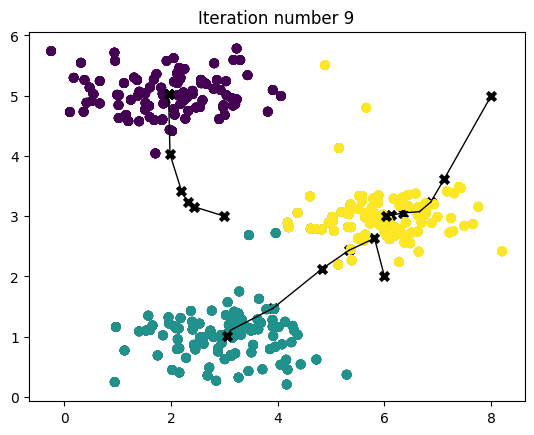

In [12]:
# Load an example dataset
X = np.load("ex7_X.npy")

# Set initial centroids
initial_centroids = np.array([[3,3],[6,2],[8,5]])
K = 3

# Number of iterations
max_iters = 10

centroids, idx = run_kMeans(X, initial_centroids, max_iters, plot_progress=True)

We observe from the final results that our 2D data converged to 3 different clusters assigned to 3 centroids as per our assignment. All the data points in their clusters are at closest distance from the mean of their centroid.

In above case, I assigned values to the centroids. However, the better way is to give them random assignment so they find the optimized points themselves.

In [13]:
def kMeans_init_centroids(X, K):
    """
    This function initializes K centroids that are to be 
    used in K-Means on the dataset X
    
    Args:
        X (ndarray): Data points 
        K (int):     number of centroids/clusters
    
    Returns:
        centroids (ndarray): Initialized centroids
    """
    
    # Randomly reorder the indices of examples
    randidx = np.random.permutation(X.shape[0])
    
    # Take the first K examples as centroids
    centroids = X[randidx[:K]]
    
    return centroids

K-Means iteration 0/9
K-Means iteration 1/9
K-Means iteration 2/9
K-Means iteration 3/9
K-Means iteration 4/9
K-Means iteration 5/9
K-Means iteration 6/9
K-Means iteration 7/9
K-Means iteration 8/9
K-Means iteration 9/9


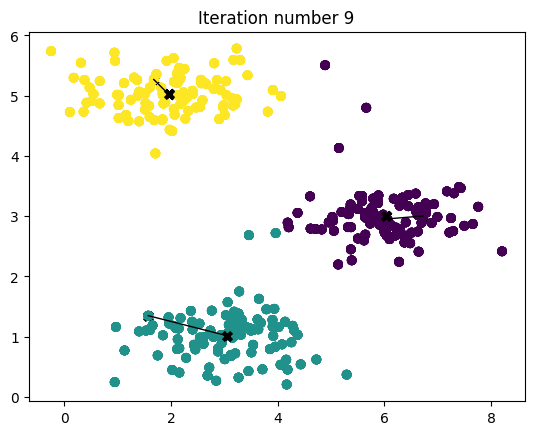

In [14]:
# change the number of centroids from here
no_of_centroids = 3

in_cn = kMeans_init_centroids(X, no_of_centroids) 
centroids, idx = run_kMeans(X, in_cn, max_iters, plot_progress=True)

As we see from random initalization that the centroids took a different path but converged in the same manner.

Change the number of centroids from the **no_of_centroids** variable to observe interesting results !

### Image Compression with K-means

- In a straightforward 24-bit color representation of an image, each pixel is represented as three 8-bit unsigned integers (ranging from 0 to 255) that specify the red, green and blue intensity values. This encoding is often refered to as the RGB encoding.
- Our image contains thousands of colors, and I will reduce the number of colours to 16.
- By making this reduction, it is possible to represent (compress) the photo in an efficient way. 
- Specifically, you only need to store the RGB values of the 16 selected colors, and for each pixel in the image you now need to only store the index of the color at that location (where only 4 bits are necessary to represent 16 possibilities). 



**How will the algorithm work on the image?**

- Concretely, you will treat every pixel in the original image as a data example and use the K-means algorithm to find the 16 colors that best group (cluster) the pixels in the 3- dimensional RGB space.
- Once you have computed the cluster centroids on the image, you will then use the 16 colors to replace the pixels in the original image.

Shape of original_img is: (128, 128, 3)


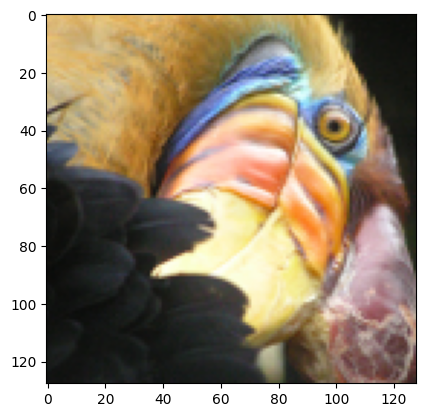

In [15]:
# Load an image of a bird by using matplotlib 
original_img = plt.imread('bird_small.png')

plt.imshow(original_img)

# first two entries tell us that image is of dimensions 128 x 128
# the third entry tells us that number of channels are 3, so this is RGB image
print("Shape of original_img is:", original_img.shape)

Before running the k-means algorithm on the image, we need to convert it to a 2D matrix. 

In [16]:
# Divide by 255 so that all values are in the range 0 - 1
original_img = original_img / 255

# Reshape the image into an m x 3 matrix where m = number of pixels
# (in this case m = 128 x 128 = 16384)
# Each row will contain the Red, Green and Blue pixel values
# This gives us our dataset matrix X_img that we will use K-Means on.

X_img = np.reshape(original_img, (original_img.shape[0] * original_img.shape[1], 3))

Now, we can run K-means successfully

In [17]:
# Try different values of K and max_iters here
K = 16                       
max_iters = 10               

# Using the function implemented. 
initial_centroids = kMeans_init_centroids(X_img, K) 

# Run K-Means (can take a couple of minutes)
centroids, idx = run_kMeans(X_img, initial_centroids, max_iters) 

K-Means iteration 0/9
K-Means iteration 1/9
K-Means iteration 2/9
K-Means iteration 3/9
K-Means iteration 4/9
K-Means iteration 5/9
K-Means iteration 6/9
K-Means iteration 7/9
K-Means iteration 8/9
K-Means iteration 9/9


In [18]:
print("Shape of idx:", idx.shape)
print("Closest centroid for the first five elements:", idx[:5])

Shape of idx: (16384,)
Closest centroid for the first five elements: [1 1 1 1 1]


**Compressing the Image**

In [19]:
# Represent image in terms of indices
X_recovered = centroids[idx, :] 

# Reshape recovered image into proper dimensions
X_recovered = np.reshape(X_recovered, original_img.shape) 

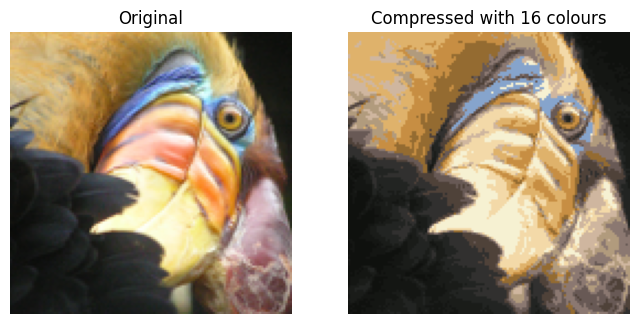

In [20]:
# Display original image
fig, ax = plt.subplots(1,2, figsize=(8,8))
plt.axis('off')

ax[0].imshow(original_img*255)
ax[0].set_title('Original')
ax[0].set_axis_off()


# Display compressed image
ax[1].imshow(X_recovered*255)
ax[1].set_title('Compressed with %d colours'%K)
ax[1].set_axis_off()